In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from matplotlib.lines import Line2D

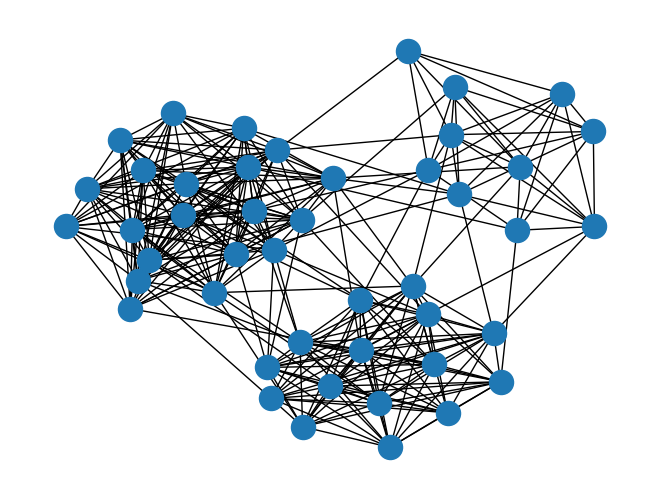

In [4]:
sizes = [10, 20, 15]

probs = [[0.80, 0.05, 0.02], [0.05, 0.80, 0.07], [0.02, 0.07, 0.90]]

graph = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw_kamada_kawai(graph)

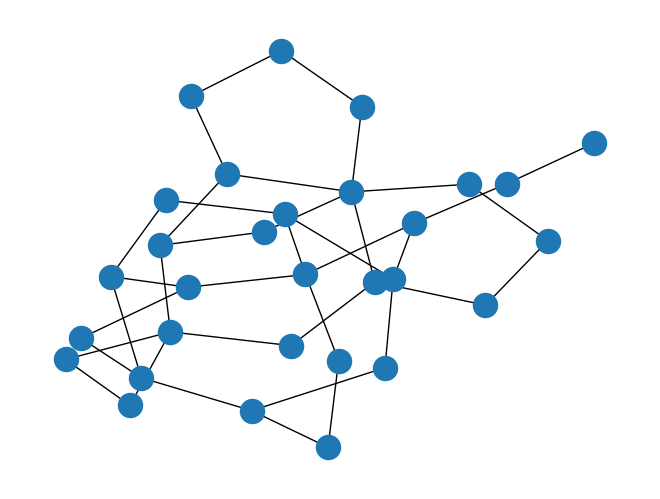

In [5]:
n = 30
tau1 = 5
tau2 = 1.1
mu = 0.01
min_degree = 2
min_community = 15
max_community = 15
seed = 0

graph = nx.LFR_benchmark_graph(
    n,
    tau1,
    tau2,
    mu,
    min_degree=min_degree,
    min_community=min_community,
    max_community=max_community,
    seed=seed
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


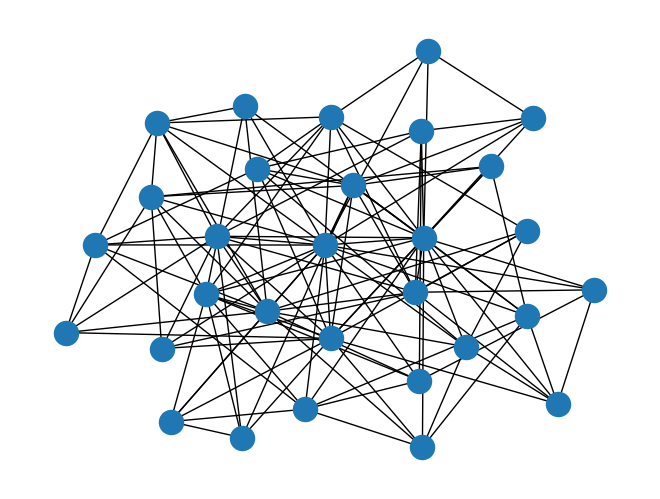

In [6]:
n = 30
m = 5
p = 0.2
seed = 0

graph = nx.powerlaw_cluster_graph(
    n,
    m,
    p,
    seed=seed
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


In [7]:
graph.nodes()[5]

{}

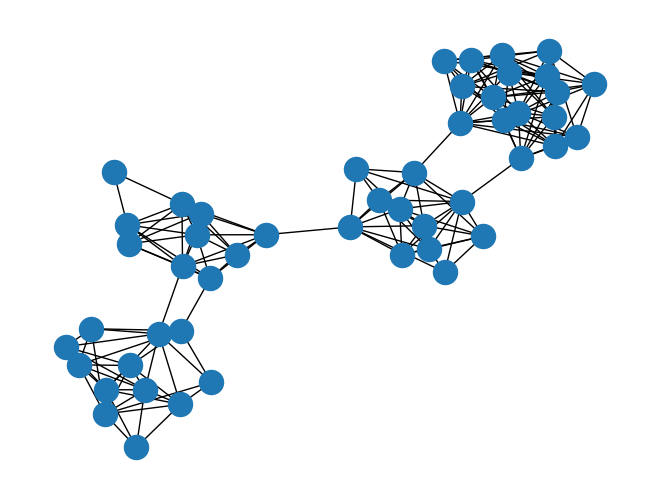

In [8]:
n = 50
s = 15
v = 6
p_in = 0.6
p_out = 0.01
seed = 0

graph = nx.gaussian_random_partition_graph(
    n=n,
    s=s,
    v=v,
    p_in=p_in,
    p_out=p_out,
    seed=seed,
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


/tmp/ipykernel_73305/1570653228.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


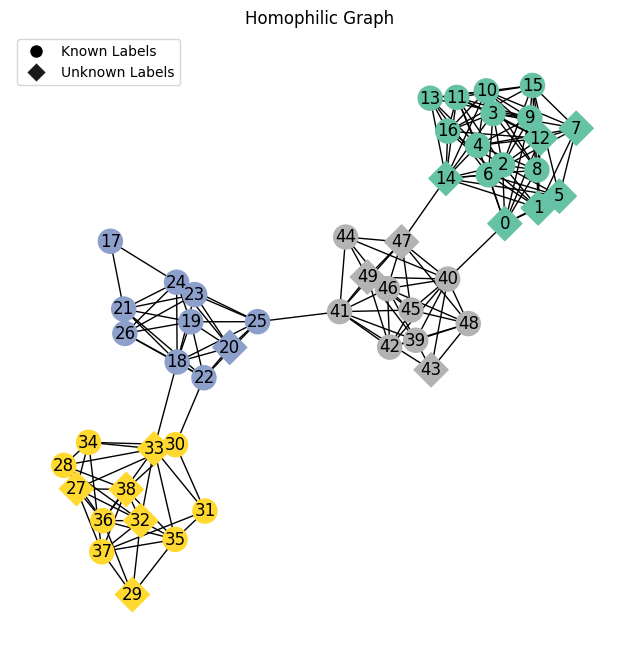

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

node_classes_hom = [graph.nodes[v]["block"] for v in graph]
class_dict = dict(zip(graph.nodes, node_classes_hom))
random.seed(0)
train_nodes = random.sample(graph.nodes, 35)
train_graph = graph.subgraph(train_nodes)
train_node_classes = [graph.nodes[v]["block"] for v in train_graph]
test_nodes = [x for x in graph if x not in train_graph]
test_graph = graph.subgraph(test_nodes)
test_node_classes = [graph.nodes[v]["block"] for v in test_graph]


nx.draw_networkx_edges(
    graph,
    pos=pos,
    # with_labels=True,
    # node_color=node_classes_hom,
    # cmap="Set2",
    ax=ax,
)
nx.draw_networkx_nodes(
    train_graph,
    pos=pos,
    # with_labels=True,
    node_color=train_node_classes,
    cmap="Set2",
    node_shape='o',
    ax=ax,
    # label='Known Labels'
)
nx.draw_networkx_nodes(
    test_graph,
    pos=pos,
    # with_labels=True,
    node_color=test_node_classes,
    cmap="Set2",
    node_shape='D',
    ax=ax,
    # label='Unknown Labels'
)
nx.draw_networkx_labels(
    graph,
    pos=pos,
    # with_labels=True,
    # node_color=node_classes_hom,
    # cmap="Set2",
    # node_shape='D',
    ax=ax,
)

ax.set_axis_off()
ax.set_title('Homophilic Graph')

legend_elements = [
    Line2D([0], [0], color='w', markerfacecolor='black', marker='o', label='Known Labels', markersize=10),
    Line2D([0], [0], color='w', markerfacecolor='black', marker='D', label='Unknown Labels', alpha=0.9, markersize=10)
]
ax.legend(handles=legend_elements, loc='upper left')

In [92]:
legend = ax.get_legend()
legend.

TypeError: Legend.get_legend_handler() missing 2 required positional arguments: 'legend_handler_map' and 'orig_handle'

/tmp/ipykernel_73305/13372420.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


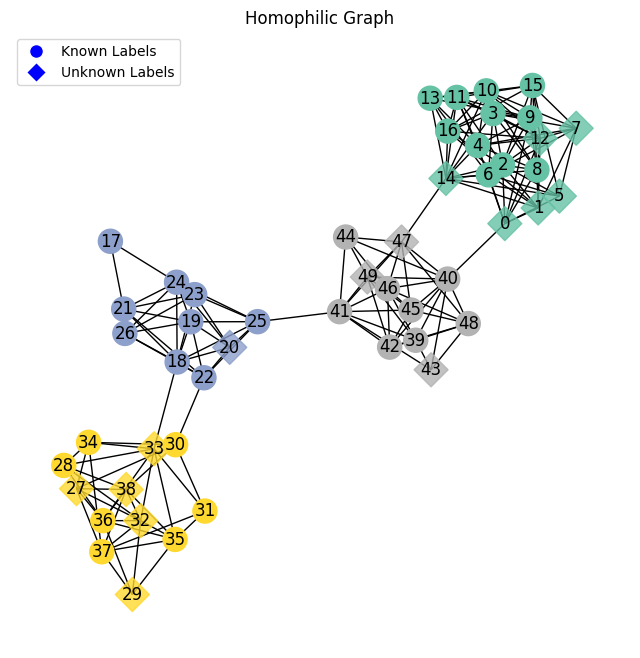

In [126]:
pos = nx.kamada_kawai_layout(graph)


def plot_homophilic(graph, ax, pos):
    random.seed(0)
    train_nodes = random.sample(graph.nodes, 35)
    train_graph = graph.subgraph(train_nodes)
    train_node_classes = [graph.nodes[v]["block"] for v in train_graph]
    test_nodes = [x for x in graph if x not in train_graph]
    test_graph = graph.subgraph(test_nodes)
    test_node_classes = [graph.nodes[v]["block"] for v in test_graph]

    nx.draw_networkx_edges(
        graph,
        pos=pos,
        # with_labels=True,
        # node_color=node_classes_hom,
        # cmap="Set2",
        ax=ax,
    )
    nx.draw_networkx_nodes(
        train_graph,
        pos=pos,
        # with_labels=True,
        node_color=train_node_classes,
        cmap="Set2",
        node_shape="o",
        ax=ax,
        label="Known Labels",
    )
    nx.draw_networkx_nodes(
        test_graph,
        pos=pos,
        # with_labels=True,
        node_color=test_node_classes,
        cmap="Set2",
        node_shape="D",
        ax=ax,
        alpha=0.8,
        label="Unknown Labels",
    )
    nx.draw_networkx_labels(
        graph,
        pos=pos,
        # with_labels=True,
        # node_color=node_classes_hom,
        # cmap="Set2",
        # node_shape='D',
        ax=ax,
    )

    ax.set_axis_off()
    ax.set_title("Homophilic Graph")
    legend_elements = [
        Line2D(
            [0],
            [0],
            color="w",
            markerfacecolor="blue",
            marker="o",
            label="Known Labels",
            markersize=10,
        ),
        Line2D(
            [0],
            [0],
            color="w",
            markerfacecolor="blue",
            marker="D",
            label="Unknown Labels",
            # alpha=0.8,
            markersize=10,
        ),
    ]
    ax.legend(handles=legend_elements, loc="upper left")


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_homophilic(graph, ax, pos)

/tmp/ipykernel_73305/2827858004.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


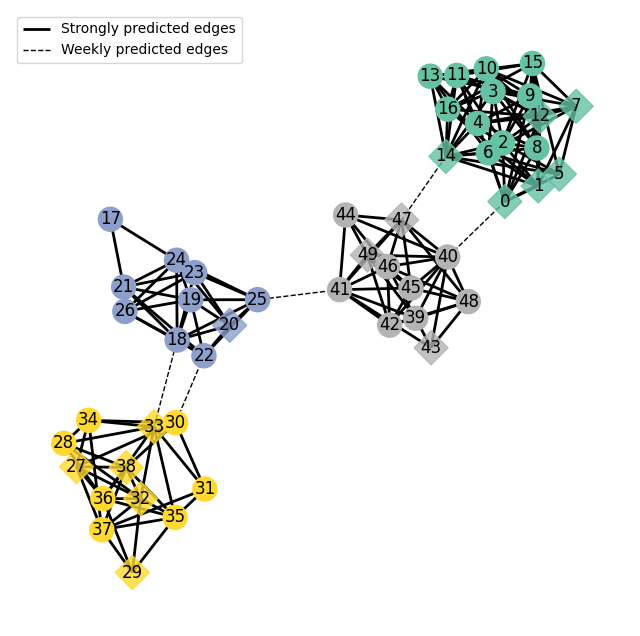

In [129]:
pos = nx.kamada_kawai_layout(graph)


def plot_homophilic_with_predictions(graph, ax, pos):
    random.seed(0)
    train_nodes = random.sample(graph.nodes, 35)
    train_graph = graph.subgraph(train_nodes)
    train_node_classes = [graph.nodes[v]["block"] for v in train_graph]
    test_nodes = [x for x in graph if x not in train_graph]
    test_graph = graph.subgraph(test_nodes)
    test_node_classes = [graph.nodes[v]["block"] for v in test_graph]

    class_dict = dict(zip(graph.nodes(), node_classes_hom))
    hom_edges = [
        x for x in graph.edges() if class_dict[x[0]] == class_dict[x[1]]
    ]
    het_edges = [
        x for x in graph.edges() if class_dict[x[0]] != class_dict[x[1]]
    ]

    hom_graph = graph.edge_subgraph(hom_edges)
    het_graph = graph.edge_subgraph(het_edges)

    nx.draw_networkx_edges(
        hom_graph,
        pos=pos,
        ax=ax,
        style="-",
        width=2,
        label="Strongly predicted edges",
    )
    nx.draw_networkx_edges(
        het_graph,
        pos=pos,
        ax=ax,
        style="--",
        width=1,
        label="Weekly predicted edges",
    )
    nx.draw_networkx_nodes(
        train_graph,
        pos=pos,
        # with_labels=True,
        node_color=train_node_classes,
        cmap="Set2",
        node_shape="o",
        ax=ax,
    )
    nx.draw_networkx_nodes(
        test_graph,
        pos=pos,
        # with_labels=True,
        node_color=test_node_classes,
        cmap="Set2",
        node_shape="D",
        ax=ax,
        alpha=0.8,
    )
    nx.draw_networkx_labels(
        graph,
        pos=pos,
        # with_labels=True,
        # node_color=node_classes_hom,
        # cmap="Set2",
        # node_shape='D',
        ax=ax,
    )

    ax.set_axis_off()
    ax.legend(loc="upper left")

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_homophilic_with_predictions(graph, ax, pos)

/tmp/ipykernel_73305/3119368517.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


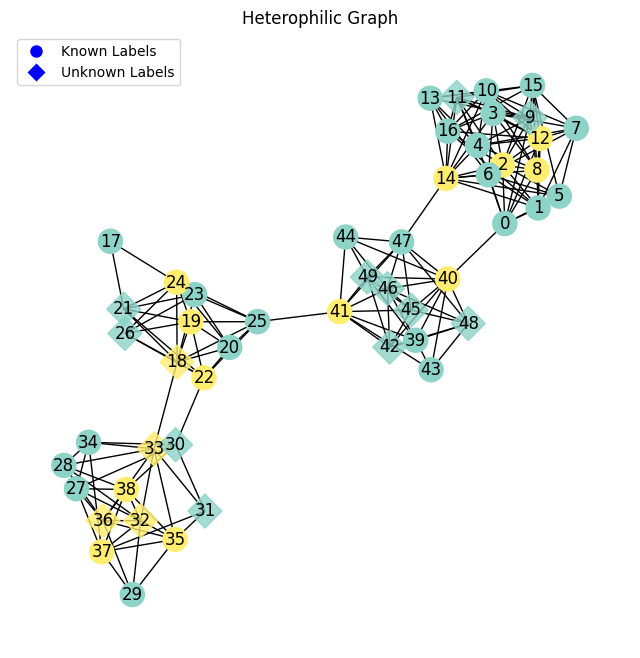

In [130]:
pos = nx.kamada_kawai_layout(graph)

def plot_heterophilic(graph, ax, pos):
    pr = nx.pagerank(graph, alpha=0.9)
    node_classes_het = [int(pr[v] > 0.022) for v in graph]
    class_dict = dict(zip(graph.nodes(), node_classes_het))

    random.seed(5)
    train_nodes = random.sample(graph.nodes, 35)
    train_graph = graph.subgraph(train_nodes)
    train_node_classes = [class_dict[v] for v in train_graph]
    test_nodes = [x for x in graph if x not in train_graph]
    test_graph = graph.subgraph(test_nodes)
    test_node_classes = [class_dict[v] for v in test_graph]

    nx.draw_networkx_edges(
        graph,
        pos=pos,
        # with_labels=True,
        # node_color=node_classes_hom,
        # cmap="Set2",
        ax=ax,
    )
    nx.draw_networkx_nodes(
        train_graph,
        pos=pos,
        # with_labels=True,
        node_color=train_node_classes,
        cmap="Set3",
        node_shape="o",
        ax=ax,
        label="Known Labels",
    )
    nx.draw_networkx_nodes(
        test_graph,
        pos=pos,
        # with_labels=True,
        node_color=test_node_classes,
        cmap="Set3",
        node_shape="D",
        ax=ax,
        alpha=0.8,
        label="Unknown Labels",
    )
    nx.draw_networkx_labels(
        graph,
        pos=pos,
        # with_labels=True,
        # node_color=node_classes_hom,
        # cmap="Set2",
        # node_shape='D',
        ax=ax,
    )

    ax.set_axis_off()
    ax.set_title("Heterophilic Graph")
    legend_elements = [
        Line2D(
            [0],
            [0],
            color="w",
            markerfacecolor="blue",
            marker="o",
            label="Known Labels",
            markersize=10,
        ),
        Line2D(
            [0],
            [0],
            color="w",
            markerfacecolor="blue",
            marker="D",
            label="Unknown Labels",
            # alpha=0.8,
            markersize=10,
        ),
    ]
    ax.legend(handles=legend_elements, loc="upper left")
    

    # nx.draw_networkx(
    #     graph,
    #     pos=pos,
    #     with_labels=True,
    #     node_color=node_classes_het,
    #     cmap='Set3',
    #     ax=ax)

    # ax.set_axis_off()
    # ax.set_title('Heterophilic Graph')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_heterophilic(graph, ax, pos)

/tmp/ipykernel_73305/126946959.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


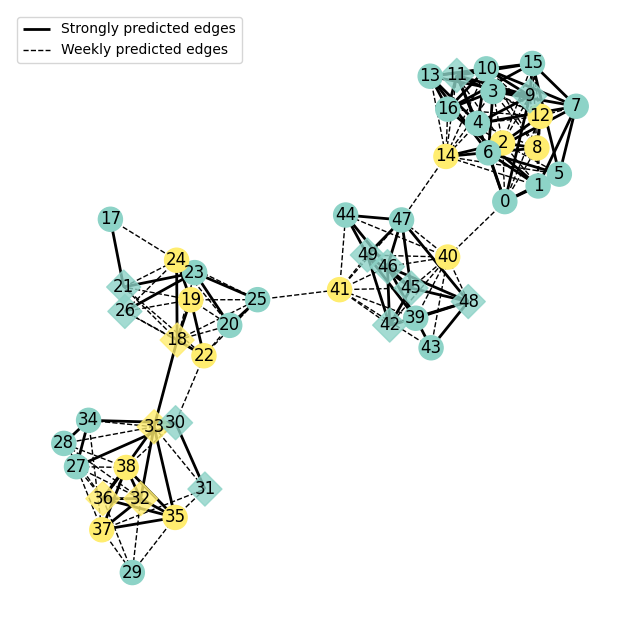

In [131]:
def plot_heterophilic_with_predictions(graph, ax, pos):
    pr = nx.pagerank(graph, alpha=0.9)
    node_classes_het = [int(pr[v] > 0.022) for v in graph]
    class_dict = dict(zip(graph.nodes(), node_classes_het))
    random.seed(5)
    train_nodes = random.sample(graph.nodes, 35)
    train_graph = graph.subgraph(train_nodes)
    train_node_classes = [class_dict[v] for v in train_graph]
    test_nodes = [x for x in graph if x not in train_graph]
    test_graph = graph.subgraph(test_nodes)
    test_node_classes = [class_dict[v] for v in test_graph]

    hom_edges = [
        x for x in graph.edges() if class_dict[x[0]] == class_dict[x[1]]
    ]
    het_edges = [
        x for x in graph.edges() if class_dict[x[0]] != class_dict[x[1]]
    ]

    hom_graph = graph.edge_subgraph(hom_edges)
    het_graph = graph.edge_subgraph(het_edges)

    nx.draw_networkx_nodes(
        train_graph,
        pos=pos,
        # with_labels=True,
        node_color=train_node_classes,
        cmap="Set3",
        node_shape="o",
        ax=ax,
    )
    nx.draw_networkx_nodes(
        test_graph,
        pos=pos,
        # with_labels=True,
        node_color=test_node_classes,
        cmap="Set3",
        node_shape="D",
        ax=ax,
        alpha=0.8,
    )

    nx.draw_networkx_labels(graph, pos=pos, ax=ax)

    nx.draw_networkx_edges(
        hom_graph,
        pos=pos,
        ax=ax,
        style="-",
        width=2,
        label="Strongly predicted edges",
    )
    nx.draw_networkx_edges(
        het_graph,
        pos=pos,
        ax=ax,
        style="--",
        width=1,
        label="Weekly predicted edges",
    )

    ax.legend(loc="upper left")
    ax.set_axis_off()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_heterophilic_with_predictions(graph, ax, pos)

/tmp/ipykernel_73305/13372420.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)
/tmp/ipykernel_73305/3119368517.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_nodes = random.sample(graph.nodes, 35)


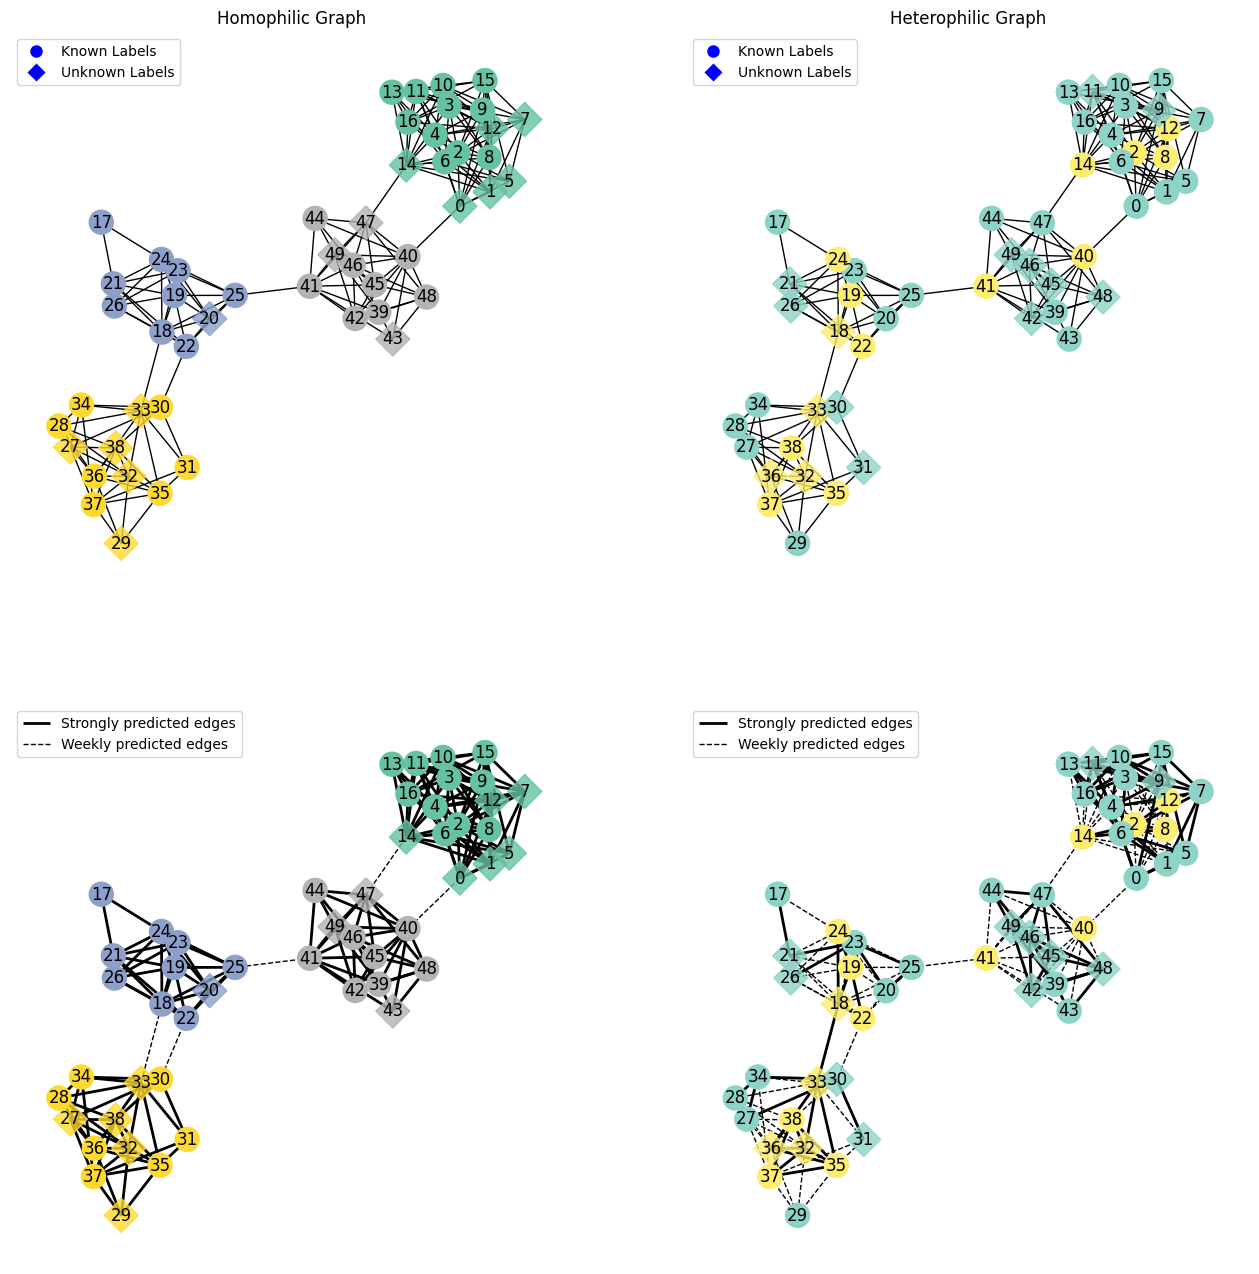

In [132]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

plot_homophilic(graph, axs[0, 0], pos)
plot_homophilic_with_predictions(graph, axs[1, 0], pos)
plot_heterophilic(graph, axs[0, 1], pos)
plot_heterophilic_with_predictions(graph, axs[1, 1], pos)

plt.savefig('reports/images/homophilic_vs_heterophilic_example_v4.svg')